<a href="https://colab.research.google.com/github/thrishaa7/Restaurent_Application/blob/main/Retail_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the needed libraries
import pandas as pd

In [2]:
tran=pd.read_csv('Retail_Data_Transactions.csv')
response=pd.read_csv('Retail_Data_Response.csv')

In [3]:
#merging both the datasets
df=tran.merge(response,on='customer_id',how='left')

In [4]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [5]:
# analysing the features
df.dtypes

,0
customer_id,object
trans_date,object
tran_amount,int64
response,float64


In [6]:
df.shape

(125000, 4)

In [7]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [8]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [9]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


**CHECKING FOR MISSING VALUES**

In [10]:
df.isnull().sum()

,0
customer_id,0
trans_date,0
tran_amount,0
response,31


**HANDLING MISSING VALUES**

In [11]:
df=df.dropna()


In [12]:
df.isnull().sum()

,0
customer_id,0
trans_date,0
tran_amount,0
response,0


**CHANGING DTYPES**

In [13]:
df['trans_date']=pd.to_datetime(df['trans_date'])

<ipython-input-13-c0fa61e093b7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])
<ipython-input-13-c0fa61e093b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])


In [14]:
df['response']=df['response'].astype('int64')

<ipython-input-14-8003a06a8332>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')


In [15]:
df.dtypes

,0
customer_id,object
trans_date,datetime64[ns]
tran_amount,int64
response,int64


**CHECK FOR OUTLIERS**

In [16]:
#Z-Score method
from scipy import stats
import numpy as np
z_scores=np.abs(stats.zscore(df['tran_amount']))
threshold=3
outliers=z_scores>threshold
print(df[outliers])

z_scoress=np.abs(stats.zscore(df['response']))
thresholds=3
outlierss=z_scoress>thresholds
print(df[outlierss])


Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []
Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


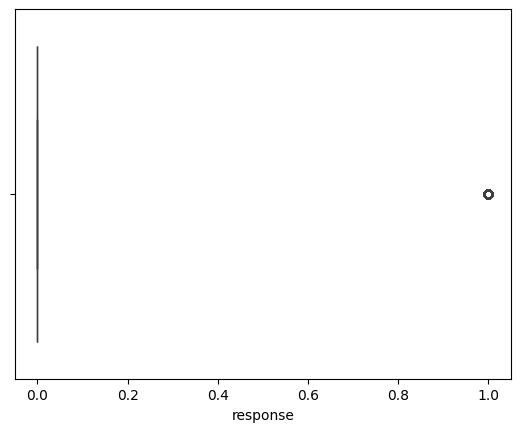

In [17]:
#using box plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['response'])
plt.show()

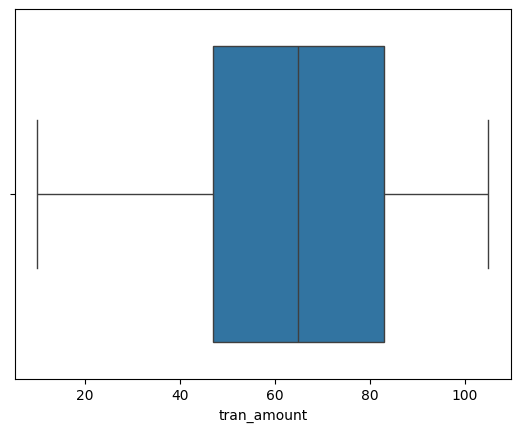

In [18]:
sns.boxplot(x=df['tran_amount'])
plt.show()

**Gaining some insights**

In [22]:
df['month']=df['tran_amount']
df

<ipython-input-22-1d24f6166cfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['tran_amount']


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,35
1,CS4768,2015-03-15,39,1,39
2,CS2122,2013-02-26,52,0,52
3,CS1217,2011-11-16,99,0,99
4,CS1850,2013-11-20,78,0,78
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,64
124996,CS7232,2014-08-19,38,0,38
124997,CS8731,2014-11-28,42,0,42
124998,CS8133,2013-12-14,13,0,13


In [23]:
# which 3 months have the highest transaction amounts
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)

In [31]:
#group by customer id and find which customers have highest number of orders /transactions
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
customer_counts.head()
#top 5
top_5_customer=customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_customer


,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

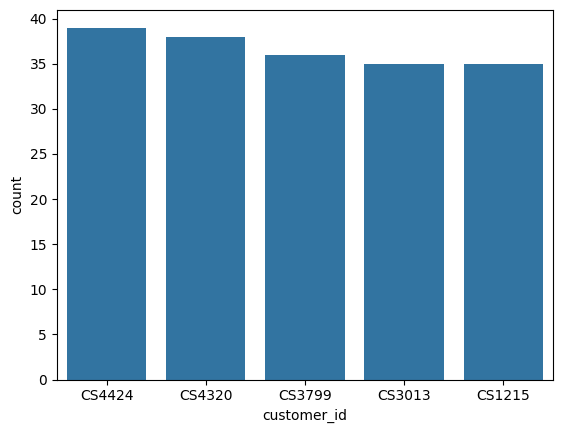

In [32]:
sns.barplot(x='customer_id',y='count',data=top_5_customer)

In [34]:
#find which customer has high values of orders
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
top_5_sales=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

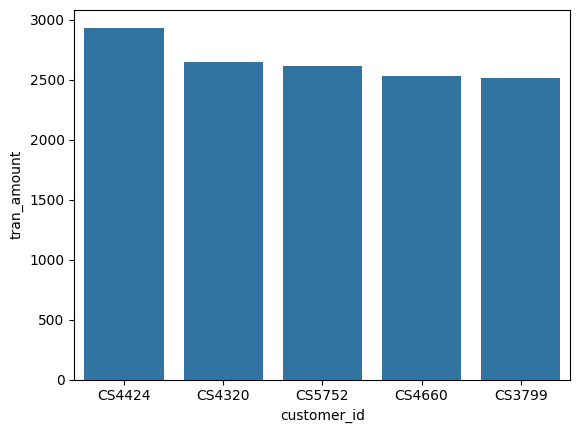

In [35]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

**ADVANCED ANALYSIS**

In [37]:
#Time series analysis
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()


<ipython-input-37-04ed21d10d62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


In [38]:
#what is the type of month_year
type(monthly_sales.index)

pandas.core.indexes.period.PeriodIndex

TypeError: DateLocator.__init__() got an unexpected keyword argument 'interval'

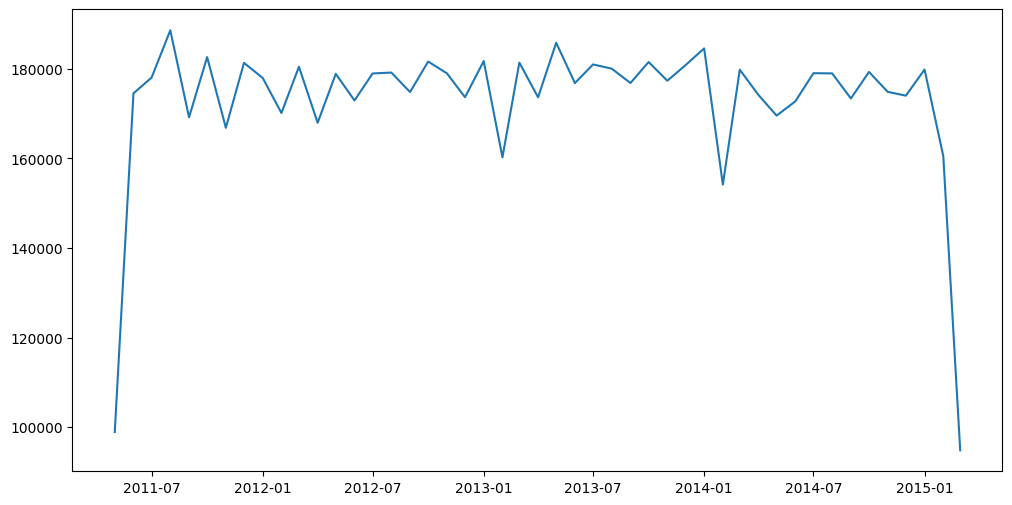

In [41]:
#cannot plot graph for period index so u need to convert to date time
monthly_sales.index=monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DateLocator(interval=6))
plt.xlabel('Month_year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2:COHORT SEGMENTATION**

In [42]:
#cohort segmentation

#based on the behaviour of the customers we are grouping them
#recency
recency=df.groupby('customer_id')['trans_date'].max()

#frequency
frequency=df.groupby('customer_id')['trans_date'].count()

#monetary
monetary=df.groupby('customer_id')['tran_amount'].sum()

#put them in a dataframe
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [45]:
#customer segmentation
def segment_customer(row):
  if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
    return 'P0'
  elif (2011<=row['recency'].year<2012) and (10<row['frequnecy']<15) and (500<=row['monetary']<=1000):
    return 'P1'
  else:
    return 'P2'
rfm['Segment']=rfm.apply(segment_customer,axis=1)


**3:CHURN ANALYSIS**

<Axes: xlabel='response'>

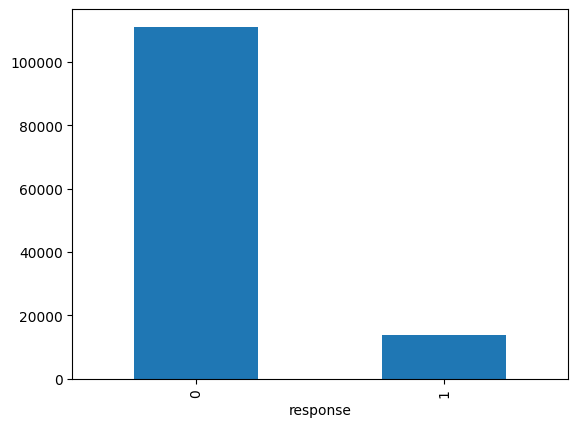

In [46]:
#CHURNING INACTIVE CUSTOMERS
churn_counts=df['response'].value_counts()
churn_counts.plot(kind='bar')

<Axes: xlabel='month_year'>

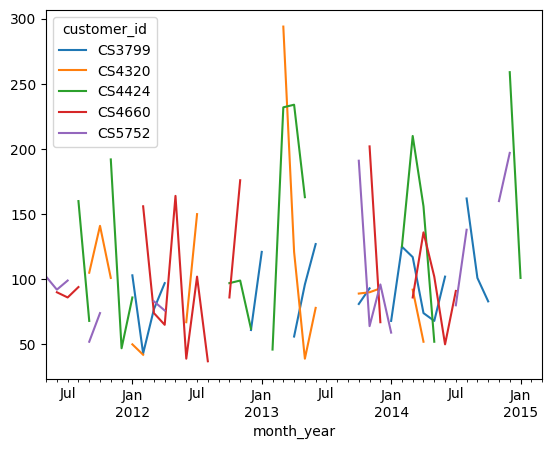

In [47]:
#analyzing the top customers
top_5_cus=monetary.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top_5_cus)]
top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')